In [81]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [4]:
G = nx.Graph()

In [5]:
G.add_node("STOREY_3")

In [7]:
G.nodes

NodeView(('STOREY_3',))

# read the space_data

In [73]:
cell_df = pd.read_csv("point_location_space.csv")
cell_df.columns

Index(['id', ' x', ' y', ' space'], dtype='object')

In [74]:
cell_df = cell_df.rename(columns={" space":"space", " x":"x", " y":"y"})

In [75]:
for i in cell_df["space"].value_counts().index:
    print(i)

OPEN_EXHIBITION_SPACE_2
ENERGY_LAB_1
OUTSIDE_RESTROOM
CAFE
BEEHUB_NEXUS


In [40]:
spaces = ["OPEN_EXHIBITION_SPACE_2",
"ENERGY_LAB_1",
"OUTSIDE_RESTROOM",
"CAFE",
"BEEHUB_NEXUS"]
G.add_nodes_from(spaces)

In [59]:
space_df = pd.DataFrame({"name":["OPEN_EXHIBITION_SPACE_2",
"ENERGY_LAB_1",
"OUTSIDE_RESTROOM",
"CAFE",
"BEEHUB_NEXUS"], "area":[8155., 1507.9, 645.47, 980., 250.94], "occupancy": [200, 30, 10, 8, 15]})
space_df

,name,area,occupancy
0,OPEN_EXHIBITION_SPACE_2,8155.00,200
1,ENERGY_LAB_1,1507.90,30
2,OUTSIDE_RESTROOM,645.47,10
3,CAFE,980.00,8
4,BEEHUB_NEXUS,250.94,15


In [68]:
space_area = {}
space_occupancy = {}

def set_space_area(x):
    space_area[x["name"]]= x["area"]
    space_occupancy[x["name"]]= x["occupancy"]

h = space_df.apply(lambda x: set_space_area(x), axis=1)
space_area

{'OPEN_EXHIBITION_SPACE_2': 8155.0,
 'ENERGY_LAB_1': 1507.9,
 'OUTSIDE_RESTROOM': 645.47,
 'CAFE': 980.0,
 'BEEHUB_NEXUS': 250.94}

In [72]:
space_df.to_csv("space_attributes.csv", index=False)

In [70]:
nx.set_node_attributes(G, space_area, "space_area")
nx.set_node_attributes(G, space_occupancy, "space_occupancy")
G.nodes

NodeView(('STOREY_3', 'OPEN_EXHIBITION_SPACE_2', 'ENERGY_LAB_1', 'OUTSIDE_RESTROOM', 'CAFE', 'BEEHUB_NEXUS'))

In [ ]:
cell_df["cell_id"] = cell_df["id"].apply(lambda x : "c_"+str(x))
cell_df = cell_df[["cell_id", "x", "y", "space"]]

In [77]:
cell_df.head()

,cell_id,x,y,space
0,c_0,123.246849,47.275810,CAFE
1,c_1,121.592880,49.439251,CAFE
2,c_2,122.885040,52.075203,CAFE
3,c_3,125.469391,53.389587,CAFE
4,c_4,127.588554,51.703442,CAFE


In [46]:
cell_df.to_csv("cell_space.csv", index=False)

In [50]:
for i in spaces:
    G.add_edge("STOREY_3", i)
G.edges

EdgeView([('STOREY_3', 'OPEN_EXHIBITION_SPACE_2'), ('STOREY_3', 'ENERGY_LAB_1'), ('STOREY_3', 'OUTSIDE_RESTROOM'), ('STOREY_3', 'CAFE'), ('STOREY_3', 'BEEHUB_NEXUS')])

In [78]:
cell_df.head()

,cell_id,x,y,space
0,c_0,123.246849,47.275810,CAFE
1,c_1,121.592880,49.439251,CAFE
2,c_2,122.885040,52.075203,CAFE
3,c_3,125.469391,53.389587,CAFE
4,c_4,127.588554,51.703442,CAFE


In [79]:
cell_x = {}
cell_y = {}
def add_cells(x):
    G.add_edge(x["cell_id"], x["space"])
    cell_x[x["cell_id"]] = x["x"]
    cell_y[x["cell_id"]] = x["y"]
    
hh = cell_df.apply(lambda x : add_cells(x), axis=1)

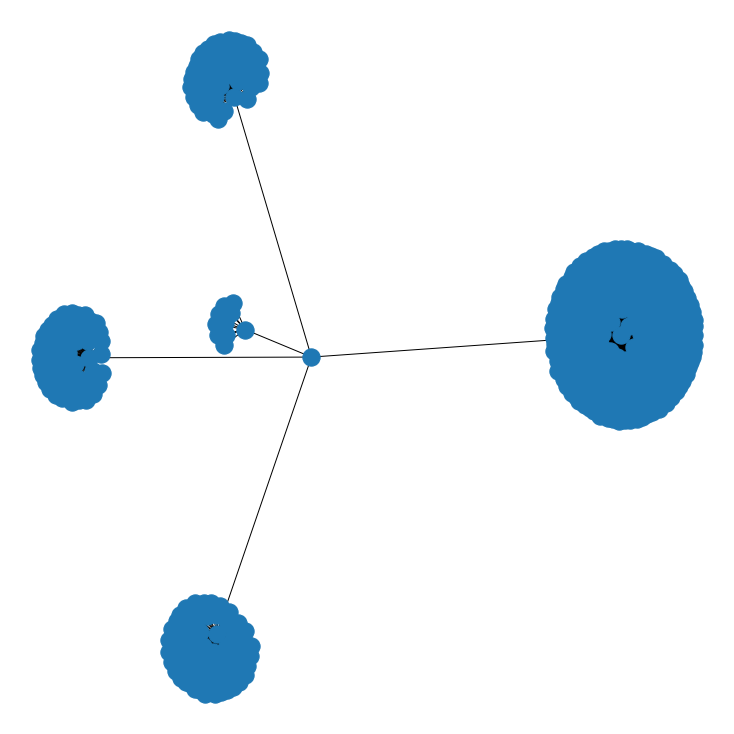

In [87]:
plt.figure(figsize=(10,10))
nx.draw(G, sizes=0.2)

In [83]:
graph_pandas = nx.to_pandas_edgelist(G)
graph_pandas

,source,target
0,STOREY_3,OPEN_EXHIBITION_SPACE_2
1,STOREY_3,ENERGY_LAB_1
2,STOREY_3,OUTSIDE_RESTROOM
3,STOREY_3,CAFE
4,STOREY_3,BEEHUB_NEXUS
...,...,...
627,BEEHUB_NEXUS,c_622
628,BEEHUB_NEXUS,c_623
629,BEEHUB_NEXUS,c_624
630,BEEHUB_NEXUS,c_625


# READ PEOPLE DATA

In [111]:
people_df = pd.read_csv("./dataframe_x_y_location.csv").sort_values(by="user_id")
people_df['user_id'].value_counts

<bound method IndexOpsMixin.value_counts of 35     cresh01
136    cresh01
137    cresh01
139    cresh01
42     cresh01
        ...   
99     cresh39
7      cresh39
159    cresh39
164    cresh39
209    cresh41
Name: user_id, Length: 341, dtype: object>